In [ ]:
 # Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy import stats
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from google.colab import drive
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random
import warnings
from sklearn.ensemble import RandomForestClassifier  # Make sure this import is included
warnings.filterwarnings("ignore")

SEED=30


In [ ]:
from google.colab import files

uploaded = files.upload()
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

attribute_names = [
    'state', 'county', 'community', 'communityname', 'fold',
    'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
    'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up',
    'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
    'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc',
    'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
    'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade',
    'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
    'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
    'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
    'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids',
    'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
    'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5',
    'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell',
    'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous',
    'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR',
    'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded',
    'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb',
    'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
    'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg',
    'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
    'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
    'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic',
    'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
    'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
    'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars',
    'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
    'PolicBudgPerPop', 'ViolentCrimesPerPop'  # This is the target variable
]


data = pd.read_csv("communities.data", header=None, names=attribute_names, na_values='?')
# Quick overview
print("Shape:", data.shape)
print(data.dtypes.value_counts())
data.head()




Saving communities.data to communities (2).data
Shape: (1994, 128)
float64    125
int64        2
object       1
Name: count, dtype: int64


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [ ]:
# total null elements

data.isnull().sum()[data.isnull().sum() > 0]

,0
county,1174
community,1177
OtherPerCap,1
LemasSwornFT,1675
LemasSwFTPerPop,1675
LemasSwFTFieldOps,1675
LemasSwFTFieldPerPop,1675
LemasTotalReq,1675
LemasTotReqPerPop,1675
PolicReqPerOffic,1675


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Calculate missing value percentage per column
missing_percentage = data.isnull().mean() * 100


# Drop columns with >50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
data = data.drop(columns=columns_to_drop)

print(f"Dropped columns with >50% missing values: {list(columns_to_drop)}")

# Now proceed with imputation for remaining columns
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)  # Mode for categorical
    else:
        data[col].fillna(data[col].mean(), inplace=True)  # Median for numerical

# Encode categorical variables
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

Dropped columns with >50% missing values: ['county', 'community', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop']


In [ ]:
# Convert ViolentCrimesPerPop to 4 classes: Low, Medium, High, Very High
def classify_crime_rate(x):
    if x < 0.2:
        return 0  # Low

    else:
        return 1  #  High

data['crime_level_multi'] = data['ViolentCrimesPerPop'].apply(classify_crime_rate)


In [ ]:
low_count = (data['crime_level_multi'] == 0).sum()
high_count = (data['crime_level_multi'] == 1).sum()

print(f"Low crime count: {low_count}")
print(f"High crime count: {high_count}")


Low crime count: 1149
High crime count: 845


In [ ]:


# Define class labels
classes = {0: 'low', 1: 'high'}

# Display value counts of target variable
print(data['crime_level_multi'].value_counts())


crime_level_multi
0    1149
1     845
Name: count, dtype: int64


In [ ]:
# Display the first few rows of the dataset
data.head()


,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,crime_level_multi
0,8,804,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20,1
1,53,1625,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67,1
2,24,1,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43,1
3,34,1787,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12,0
4,42,141,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03,0


In [ ]:
data.dtypes

,0
state,int64
communityname,int64
fold,int64
population,float64
householdsize,float64
...,...
PopDens,float64
PctUsePubTrans,float64
LemasPctOfficDrugUn,float64
ViolentCrimesPerPop,float64


**Preprocessing**


In [ ]:

data=data.drop(['ViolentCrimesPerPop'],axis=1)


In [ ]:
print("Shape:", data.shape)


Shape: (1994, 104)


In [ ]:
# Separate features and target variable
X = data.drop('crime_level_multi', axis=1)
y = data['crime_level_multi']

In [ ]:
# Calculate feature importance using Mutual Information and Point-Biserial correlation
point_biserial_coefs = []
for i in range(X.shape[1]):
    coef = stats.pointbiserialr(X.iloc[:, i], y)[0]
    point_biserial_coefs.append(coef)

mutual_inf = mutual_info_classif(X, y)

In [ ]:
# Create a DataFrame to store feature importance
feature_importance = pd.DataFrame({'Mutual Inf': mutual_inf, 'Point-BiSerial': point_biserial_coefs}, index=X.columns)

In [ ]:
# Sort feature importance based on 'Point-BiSerial' column in descending order
sorted_feature_importance = feature_importance.sort_values(by='Point-BiSerial', ascending=False)

print(sorted_feature_importance)

                  Mutual Inf  Point-BiSerial
PctIlleg            0.252777        0.605176
FemalePctDiv        0.165450        0.539207
pctWPubAsst         0.187538        0.537491
TotalPctDiv         0.156913        0.530653
MalePctDivorce      0.155627        0.497376
...                      ...             ...
pctWInvInc          0.191465       -0.558073
PctYoungKids2Par    0.199899       -0.581268
racePctWhite        0.216485       -0.585269
PctFam2Par          0.235440       -0.611689
PctKids2Par         0.264873       -0.646282

[103 rows x 2 columns]


In [ ]:
feature_importance.sort_values(by = 'Mutual Inf', ascending = False)


,Mutual Inf,Point-BiSerial
PctKids2Par,0.264873,-0.646282
PctIlleg,0.252777,0.605176
PctFam2Par,0.235440,-0.611689
NumIlleg,0.219341,0.317806
racePctWhite,0.216485,-0.585269
...,...,...
pctWFarmSelf,0.001781,-0.100596
pctWRetire,0.001239,-0.087567
PctWorkMomYoungKids,0.000000,-0.029107
MedYrHousBuilt,0.000000,-0.072401


In [ ]:
print(X.columns)


Index(['state', 'communityname', 'fold', 'population', 'householdsize',
       'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp',
       'agePct12t21',
       ...
       'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
       'PctSameCity85', 'PctSameState85', 'LandArea', 'PopDens',
       'PctUsePubTrans', 'LemasPctOfficDrugUn'],
      dtype='object', length=103)


In [ ]:
SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True, random_state = SEED)

print('train samples ->', X_train.shape)
print('test samples ->', X_test.shape)

train samples -> (1595, 103)
test samples -> (399, 103)


In [ ]:
# Scaling numerical data
MM = MinMaxScaler()
MM_fit = MM.fit(X_train)
X_train = MM_fit.transform(X_train)
X_test = MM_fit.transform(X_test)


In [ ]:
# Evaluation metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred)
    }


# Define classifiers
models = {
    "SVM": SVC(kernel='linear', C=1),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}



In [ ]:
# === Evaluate on All Features ===
print("\n🔍 Performance on All Features")
results_all = {}
for name, model in models.items():
    results_all[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Debug: Print the structure of results_all
print("\nDebug - results_all structure:")
print(results_all)

# Create DataFrame (use correct keys from results_all)
all_results_df = pd.DataFrame(results_all).T

# Ensure the keys match what evaluate_model() returns
required_columns = ['accuracy', 'precision', 'recall', 'f1_score']  # Updated to match actual keys
all_results_df = all_results_df[required_columns]

# Rename columns for better display (optional)
all_results_df.columns = ['Accuracy', 'Precision', 'Recall', 'F1-score']
all_results_df['Model'] = all_results_df.index

# Reorder columns
all_results_df = all_results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']]

print("\nFormatted Results After All Features Evaluation:")
print(all_results_df)


🔍 Performance on All Features

Debug - results_all structure:
{'SVM': {'accuracy': 0.8320802005012531, 'precision': 0.8378378378378378, 'recall': 0.7425149700598802, 'f1_score': 0.7873015873015873}, 'KNN': {'accuracy': 0.8270676691729323, 'precision': 0.8223684210526315, 'recall': 0.7485029940119761, 'f1_score': 0.7836990595611285}, 'Random Forest': {'accuracy': 0.8446115288220551, 'precision': 0.8431372549019608, 'recall': 0.7724550898203593, 'f1_score': 0.80625}}

Formatted Results After All Features Evaluation:
                       Model  Accuracy  Precision    Recall  F1-score
SVM                      SVM  0.832080   0.837838  0.742515  0.787302
KNN                      KNN  0.827068   0.822368  0.748503  0.783699
Random Forest  Random Forest  0.844612   0.843137  0.772455  0.806250



Evaluating SVM using all features
Accuracy Score: 83.21 %

Classification Report:
              precision    recall  f1-score   support

         low       0.83      0.90      0.86       232
        high       0.84      0.74      0.79       167

    accuracy                           0.83       399
   macro avg       0.83      0.82      0.82       399
weighted avg       0.83      0.83      0.83       399



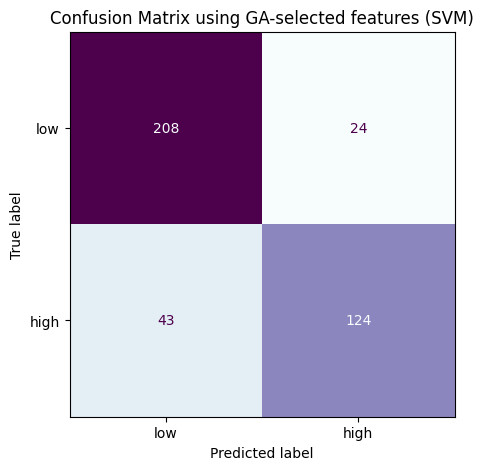


Evaluating KNN using all features
Accuracy Score: 82.71 %

Classification Report:
              precision    recall  f1-score   support

         low       0.83      0.88      0.86       232
        high       0.82      0.75      0.78       167

    accuracy                           0.83       399
   macro avg       0.83      0.82      0.82       399
weighted avg       0.83      0.83      0.83       399



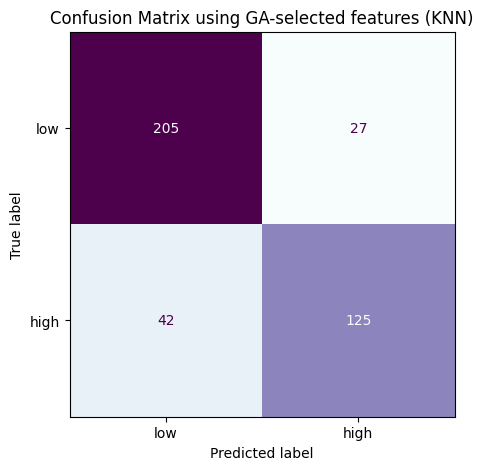


Evaluating Random Forest using all features
Accuracy Score: 84.46 %

Classification Report:
              precision    recall  f1-score   support

         low       0.85      0.90      0.87       232
        high       0.84      0.77      0.81       167

    accuracy                           0.84       399
   macro avg       0.84      0.83      0.84       399
weighted avg       0.84      0.84      0.84       399



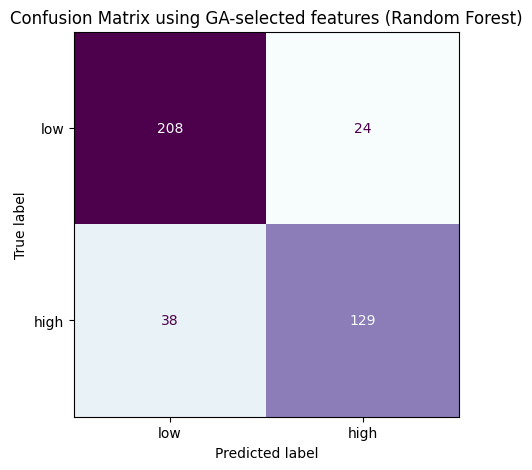

In [ ]:

# Evaluate and visualize results for all models
for name, model in models.items():
    print(f"\n{'='*30}\nEvaluating {name} using all features\n{'='*30}")

    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {acc * 100:.2f} %")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=list(classes.values())))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(classes.values()))

    fig, ax = plt.subplots(figsize=(5, 5))
    disp.plot(ax=ax, cmap='BuPu', colorbar=False)
    plt.title(f"Confusion Matrix using GA-selected features ({name})")
    plt.show()





## **GA**

In [ ]:
# Define GA hyperparameters
size = 100  # Population size
n_feat = X_train.shape[1]  # Number of features
n_parents = 50  # Number of parents to select
mutation_rate = 0.1  # Mutation rate
n_gen = 30  # Number of generations

In [ ]:
# Function for initialization of population in GA
def initialization_of_population(size, n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat, dtype=bool)
        chromosome[:int(0.3 * n_feat)] = False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def fitness_score(population):
    scores = []
    for chromosome in population:
        model.fit(X_train[:, chromosome], y_train)
        predictions = model.predict(X_test[:, chromosome])
        scores.append(accuracy_score(y_test, predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds, :][::-1])

In [ ]:
# Function for selection in GA
def selection(pop_after_fit, n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

In [ ]:
# Function for crossover in GA
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0, len(pop_after_sel), 2):
        new_par = []
        child_1, child_2 = pop_nextgen[i], pop_nextgen[i + 1]
        new_par = np.concatenate((child_1[:len(child_1) // 2], child_2[len(child_1) // 2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen

In [ ]:
# Function for mutation in GA
def mutation(pop_after_cross, mutation_rate, n_feat):
    mutation_range = int(mutation_rate * n_feat)
    pop_next_gen = []
    for n in range(0, len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0, mutation_range):
            pos = np.random.randint(0, n_feat - 1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

In [ ]:
# Function for GA generations
def generations(size, n_feat, n_parents, mutation_rate, n_gen, X_train, X_test, y_train, y_test):
    best_chromo = []
    best_score = []
    population_nextgen = initialization_of_population(size, n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation', i + 1, ':', scores[:1])  # Print best score in each generation
        pop_after_sel = selection(pop_after_fit, n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross, mutation_rate, n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo, best_score

In [ ]:
# Run GA after hyperparameter optimization
best_chromo, best_score = generations(size, n_feat, n_parents, mutation_rate, n_gen,
                                                               X_train, X_test, y_train, y_test)

Best score in generation 1 : [0.8621553884711779]
Best score in generation 2 : [0.8671679197994987]
Best score in generation 3 : [0.8671679197994987]
Best score in generation 4 : [0.8621553884711779]
Best score in generation 5 : [0.8671679197994987]
Best score in generation 6 : [0.8671679197994987]
Best score in generation 7 : [0.8646616541353384]
Best score in generation 8 : [0.8671679197994987]
Best score in generation 9 : [0.8646616541353384]
Best score in generation 10 : [0.8721804511278195]
Best score in generation 11 : [0.8671679197994987]
Best score in generation 12 : [0.8621553884711779]
Best score in generation 13 : [0.87468671679198]
Best score in generation 14 : [0.8646616541353384]
Best score in generation 15 : [0.8721804511278195]
Best score in generation 16 : [0.8696741854636592]
Best score in generation 17 : [0.8671679197994987]
Best score in generation 18 : [0.8646616541353384]
Best score in generation 19 : [0.8721804511278195]
Best score in generation 20 : [0.864661654

In [ ]:
# Get the best chromosome
best_chromosome = best_chromo[-1]

# Filter features based on the best chromosome
selected_features = X.columns[best_chromosome]

# Print number of selected features
print(f"Number of selected features: {len(selected_features)}")

# Print selected feature names
print("Best features selected by GA:")
print(selected_features)


Number of selected features: 50
Best features selected by GA:
Index(['fold', 'racePctHisp', 'agePct12t21', 'agePct16t24', 'pctUrban',
       'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'AsianPerCap', 'HispPerCap',
       'NumUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
       'PctEmplManu', 'MalePctNevMarr', 'PctFam2Par', 'PctKids2Par',
       'PctYoungKids2Par', 'PctWorkMomYoungKids', 'PctImmigRec8',
       'PctImmigRec10', 'PctRecImmig5', 'PctRecImmig8', 'PctNotSpeakEnglWell',
       'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous',
       'PersPerRentOccHous', 'PctPersDenseHous', 'MedNumBR', 'PctHousOwnOcc',
       'PctVacantBoarded', 'MedYrHousBuilt', 'OwnOccMedVal', 'RentLowQ',
       'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
       'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet',
       'PctBornSameState', 'PctSameCity85', 'PctSameState85', 'LandArea',
       'PopDens', 'PctUsePubTrans', 'LemasPctOfficDrugUn'],
      dtype='

In [ ]:
# Select only the best features for training
X_train_ga = X_train[:, best_chromosome]
X_test_ga = X_test[:, best_chromosome]




Evaluating SVM using GA-selected features
Accuracy Score: 82.46 %

Classification Report:
              precision    recall  f1-score   support

         low       0.82      0.89      0.85       232
        high       0.83      0.74      0.78       167

    accuracy                           0.82       399
   macro avg       0.82      0.81      0.82       399
weighted avg       0.82      0.82      0.82       399



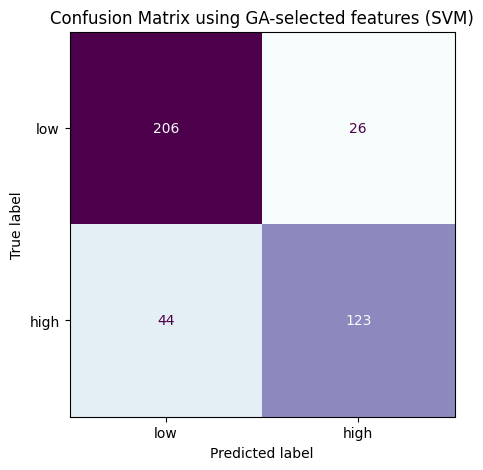


Evaluating KNN using GA-selected features
Accuracy Score: 80.45 %

Classification Report:
              precision    recall  f1-score   support

         low       0.81      0.87      0.84       232
        high       0.79      0.72      0.75       167

    accuracy                           0.80       399
   macro avg       0.80      0.79      0.80       399
weighted avg       0.80      0.80      0.80       399



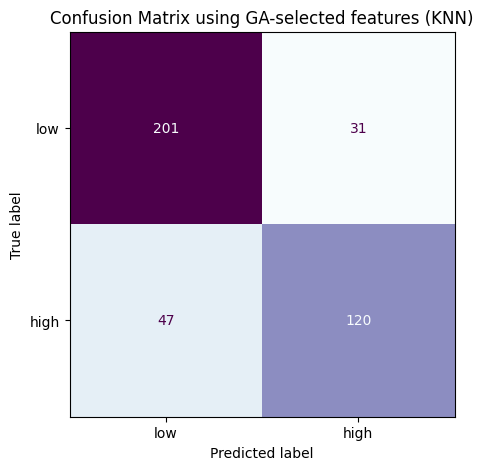


Evaluating Random Forest using GA-selected features
Accuracy Score: 85.46 %

Classification Report:
              precision    recall  f1-score   support

         low       0.86      0.90      0.88       232
        high       0.85      0.79      0.82       167

    accuracy                           0.85       399
   macro avg       0.85      0.85      0.85       399
weighted avg       0.85      0.85      0.85       399



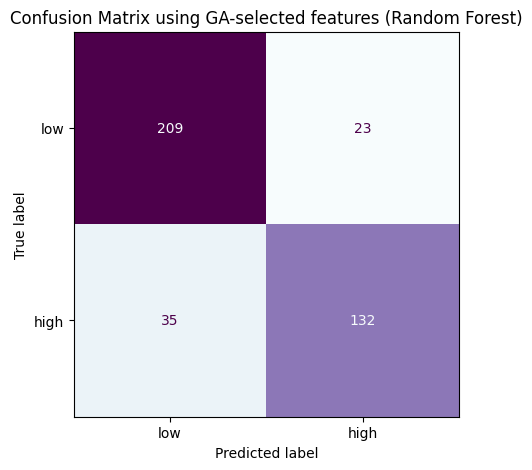

In [ ]:
# Evaluate and visualize results for all models
for name, model in models.items():
    print(f"\n{'='*30}\nEvaluating {name} using GA-selected features\n{'='*30}")

    # Train and predict
    model.fit(X_train_ga, y_train)
    y_pred = model.predict(X_test_ga)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {acc * 100:.2f} %")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=list(classes.values())))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(classes.values()))

    fig, ax = plt.subplots(figsize=(5, 5))
    disp.plot(ax=ax, cmap='BuPu', colorbar=False)
    plt.title(f"Confusion Matrix using GA-selected features ({name})")
    plt.show()


## **PSO**

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# PSO parameters
n_particles = 30       # Number of particles in the swarm
n_iterations = 50      # Number of iterations (generations)
n_features = X_train.shape[1]  # Number of features

w = 0.5                # Inertia weight
c1 = 1.5               # Cognitive component (personal best influence)
c2 = 1.5               # Social component (global best influence)

# Set random seed for reproducibility
np.random.seed(SEED)

# Initialize particles and velocities
particles = np.random.rand(n_particles, n_features)      # Positions (values between 0 and 1)
velocities = np.random.rand(n_particles, n_features)     # Velocities

# Initialize personal best positions and scores
personal_best_positions = particles.copy()
personal_best_scores = np.zeros(n_particles)

# Evaluate initial particles
for i in range(n_particles):
    selected = particles[i] > 0.5  # Binary mask for selected features
    if np.sum(selected) == 0:      # If no feature selected
        personal_best_scores[i] = 0
    else:

        model.fit(X_train[:, selected], y_train)
        preds = model.predict(X_test[:, selected])
        personal_best_scores[i] = accuracy_score(y_test, preds)

# Find the global best particle
global_best_idx = np.argmax(personal_best_scores)
global_best_position = personal_best_positions[global_best_idx].copy()

# PSO main loop
for iteration in range(n_iterations):
    for i in range(n_particles):
        # Generate random numbers for velocity update
        r1 = np.random.rand(n_features)
        r2 = np.random.rand(n_features)

        # Update velocity based on personal and global bests
        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best_positions[i] - particles[i])
            + c2 * r2 * (global_best_position - particles[i])
        )

        # Update particle position and clip to [0, 1]
        particles[i] += velocities[i]
        particles[i] = np.clip(particles[i], 0, 1)

        # Evaluate new position
        selected = particles[i] > 0.5
        if np.sum(selected) == 0:
            score = 0
        else:
            model = SVC(kernel='linear', random_state=SEED)
            model.fit(X_train[:, selected], y_train)
            preds = model.predict(X_test[:, selected])
            score = accuracy_score(y_test, preds)

        # Update personal best if current score is better
        if score > personal_best_scores[i]:
            personal_best_scores[i] = score
            personal_best_positions[i] = particles[i].copy()

    # Update global best
    global_best_idx = np.argmax(personal_best_scores)
    global_best_position = personal_best_positions[global_best_idx].copy()

    print(f"Iteration {iteration+1}/{n_iterations}, Best Accuracy: {personal_best_scores[global_best_idx]:.4f}")



Iteration 1/50, Best Accuracy: 0.8697
Iteration 2/50, Best Accuracy: 0.8697
Iteration 3/50, Best Accuracy: 0.8697
Iteration 4/50, Best Accuracy: 0.8697
Iteration 5/50, Best Accuracy: 0.8697
Iteration 6/50, Best Accuracy: 0.8697
Iteration 7/50, Best Accuracy: 0.8697
Iteration 8/50, Best Accuracy: 0.8697
Iteration 9/50, Best Accuracy: 0.8697
Iteration 10/50, Best Accuracy: 0.8697
Iteration 11/50, Best Accuracy: 0.8697
Iteration 12/50, Best Accuracy: 0.8697
Iteration 13/50, Best Accuracy: 0.8697
Iteration 14/50, Best Accuracy: 0.8697
Iteration 15/50, Best Accuracy: 0.8697
Iteration 16/50, Best Accuracy: 0.8697
Iteration 17/50, Best Accuracy: 0.8697
Iteration 18/50, Best Accuracy: 0.8697
Iteration 19/50, Best Accuracy: 0.8697
Iteration 20/50, Best Accuracy: 0.8697
Iteration 21/50, Best Accuracy: 0.8697
Iteration 22/50, Best Accuracy: 0.8697
Iteration 23/50, Best Accuracy: 0.8697
Iteration 24/50, Best Accuracy: 0.8697
Iteration 25/50, Best Accuracy: 0.8697
Iteration 26/50, Best Accuracy: 0.

In [ ]:

# Get the best feature subset from the final global best particle
best_features_mask = global_best_position > 0.5
selected_features = X.columns[best_features_mask]


# Print number of selected features
print(f"Number of selected features: {len(selected_features)}")
print("Best features selected by PSO:")
print(selected_features)

# Train final model using selected features
X_train_pso = X_train[:, best_features_mask]
X_test_pso = X_test[:, best_features_mask]

Number of selected features: 57
Best features selected by PSO:
Index(['state', 'communityname', 'fold', 'population', 'householdsize',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctWWage', 'pctWPubAsst',
       'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
       'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov',
       'PctBSorMore', 'PctUnemployed', 'PctEmplProfServ', 'PctOccupManu',
       'PctOccupMgmtProf', 'MalePctNevMarr', 'PctFam2Par', 'PctKids2Par',
       'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctRecentImmig',
       'PctRecImmig8', 'PctSpeakEnglOnly', 'PctLargHouseFam',
       'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersDenseHous',
       'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup',
       'PctVacantBoarded', 'MedYrHousBuilt', 'OwnOccHiQuart', 'RentLowQ',
       'RentHighQ', 'MedRent', 'MedOwnCostPctInc', 'NumStreet',
   


Evaluating SVM using GA-selected features
Accuracy Score: 84.46 %

Classification Report:
              precision    recall  f1-score   support

         low       0.84      0.91      0.87       232
        high       0.86      0.75      0.80       167

    accuracy                           0.84       399
   macro avg       0.85      0.83      0.84       399
weighted avg       0.85      0.84      0.84       399



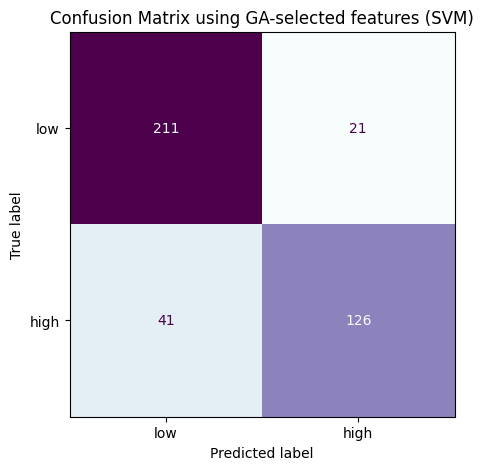


Evaluating KNN using GA-selected features
Accuracy Score: 82.46 %

Classification Report:
              precision    recall  f1-score   support

         low       0.83      0.88      0.85       232
        high       0.81      0.75      0.78       167

    accuracy                           0.82       399
   macro avg       0.82      0.81      0.82       399
weighted avg       0.82      0.82      0.82       399



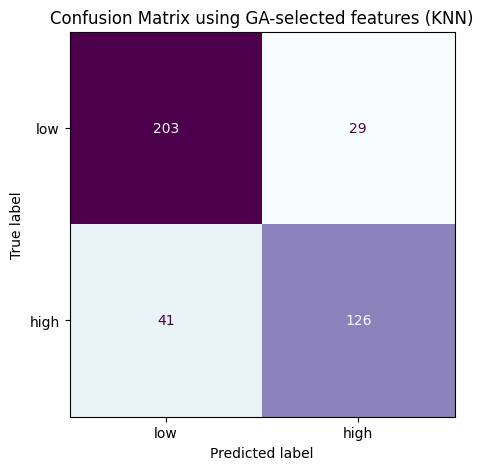


Evaluating Random Forest using GA-selected features
Accuracy Score: 86.97 %

Classification Report:
              precision    recall  f1-score   support

         low       0.87      0.91      0.89       232
        high       0.87      0.81      0.84       167

    accuracy                           0.87       399
   macro avg       0.87      0.86      0.86       399
weighted avg       0.87      0.87      0.87       399



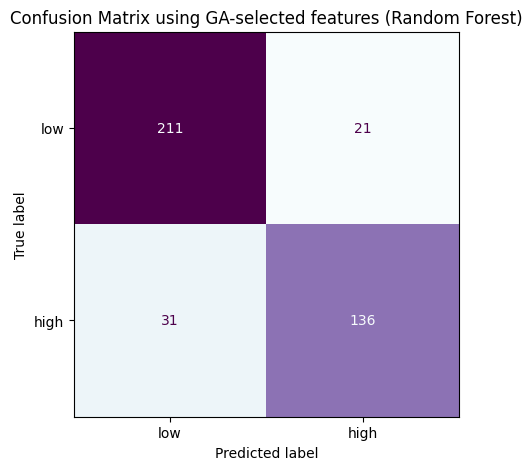

In [ ]:


# Evaluate and visualize results for all models
for name, model in models.items():
    print(f"\n{'='*30}\nEvaluating {name} using GA-selected features\n{'='*30}")

    # Train and predict
    model.fit(X_train_pso, y_train)
    y_pred = model.predict(X_test_pso)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {acc * 100:.2f} %")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=list(classes.values())))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(classes.values()))

    fig, ax = plt.subplots(figsize=(5, 5))
    disp.plot(ax=ax, cmap='BuPu', colorbar=False)
    plt.title(f"Confusion Matrix using GA-selected features ({name})")
    plt.show()


📌 SVM (All Features)
              precision    recall  f1-score   support

         low       0.83      0.90      0.86       232
        high       0.84      0.74      0.79       167

    accuracy                           0.83       399
   macro avg       0.83      0.82      0.82       399
weighted avg       0.83      0.83      0.83       399



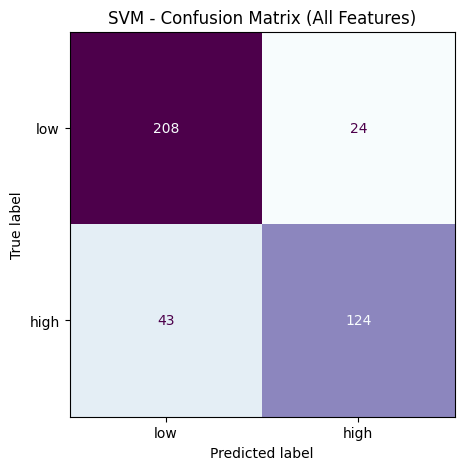


📌 SVM (GA Selected)
              precision    recall  f1-score   support

         low       0.82      0.89      0.85       232
        high       0.83      0.74      0.78       167

    accuracy                           0.82       399
   macro avg       0.82      0.81      0.82       399
weighted avg       0.82      0.82      0.82       399



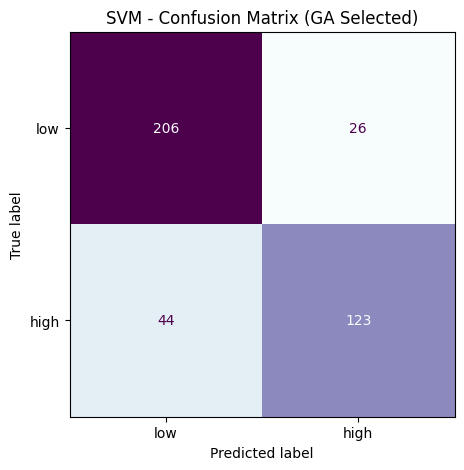


📌 SVM (PSO Selected)
              precision    recall  f1-score   support

         low       0.84      0.91      0.87       232
        high       0.86      0.75      0.80       167

    accuracy                           0.84       399
   macro avg       0.85      0.83      0.84       399
weighted avg       0.85      0.84      0.84       399



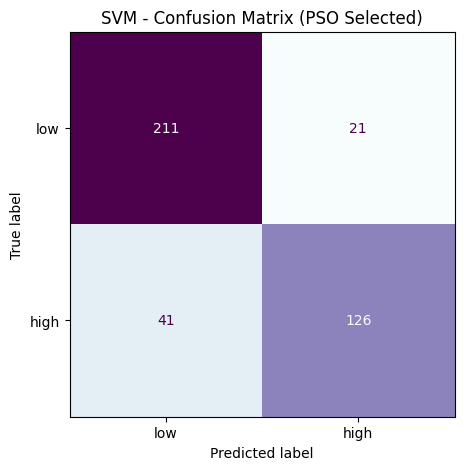


📌 KNN (All Features)
              precision    recall  f1-score   support

         low       0.83      0.88      0.86       232
        high       0.82      0.75      0.78       167

    accuracy                           0.83       399
   macro avg       0.83      0.82      0.82       399
weighted avg       0.83      0.83      0.83       399



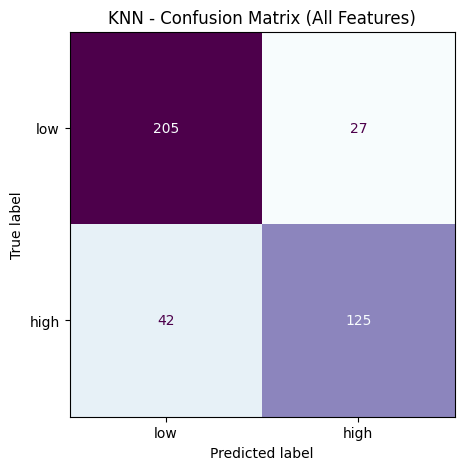


📌 KNN (GA Selected)
              precision    recall  f1-score   support

         low       0.81      0.87      0.84       232
        high       0.79      0.72      0.75       167

    accuracy                           0.80       399
   macro avg       0.80      0.79      0.80       399
weighted avg       0.80      0.80      0.80       399



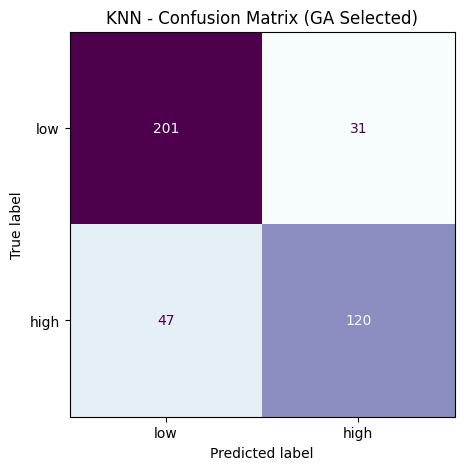


📌 KNN (PSO Selected)
              precision    recall  f1-score   support

         low       0.83      0.88      0.85       232
        high       0.81      0.75      0.78       167

    accuracy                           0.82       399
   macro avg       0.82      0.81      0.82       399
weighted avg       0.82      0.82      0.82       399



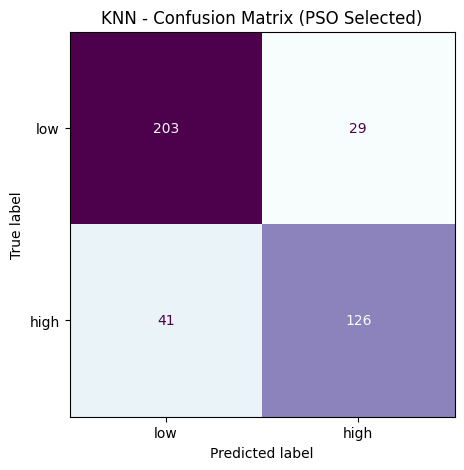


📌 Random Forest (All Features)
              precision    recall  f1-score   support

         low       0.85      0.90      0.87       232
        high       0.84      0.77      0.81       167

    accuracy                           0.84       399
   macro avg       0.84      0.83      0.84       399
weighted avg       0.84      0.84      0.84       399



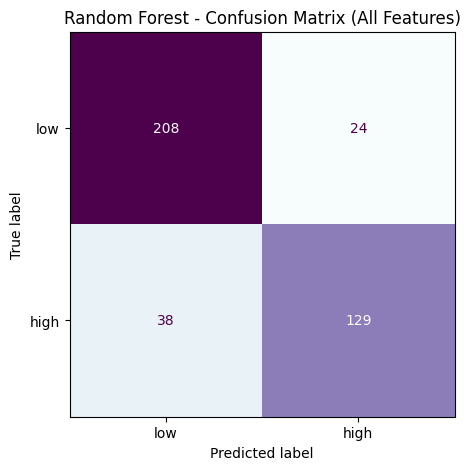


📌 Random Forest (GA Selected)
              precision    recall  f1-score   support

         low       0.86      0.90      0.88       232
        high       0.85      0.79      0.82       167

    accuracy                           0.85       399
   macro avg       0.85      0.85      0.85       399
weighted avg       0.85      0.85      0.85       399



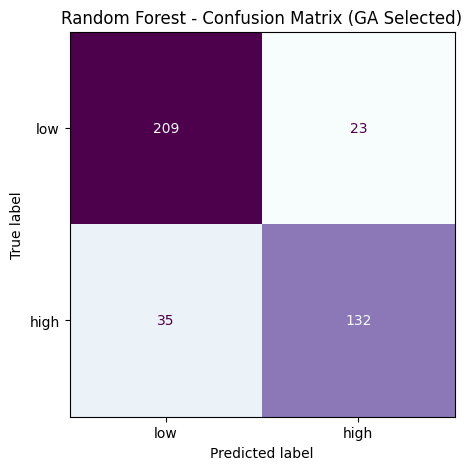


📌 Random Forest (PSO Selected)
              precision    recall  f1-score   support

         low       0.87      0.91      0.89       232
        high       0.87      0.81      0.84       167

    accuracy                           0.87       399
   macro avg       0.87      0.86      0.86       399
weighted avg       0.87      0.87      0.87       399



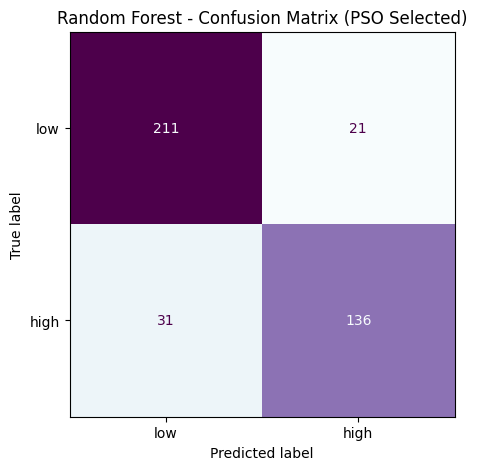


🔎 Model Comparison Table:
           Model   Feature_Set  Accuracy  Precision  Recall  F1_Score
0            SVM  All Features     0.832      0.838   0.743     0.787
1            SVM   GA Selected     0.825      0.826   0.737     0.778
2            SVM  PSO Selected     0.845      0.857   0.754     0.803
3            KNN  All Features     0.827      0.822   0.749     0.784
4            KNN   GA Selected     0.805      0.795   0.719     0.755
5            KNN  PSO Selected     0.825      0.813   0.754     0.783
6  Random Forest  All Features     0.845      0.843   0.772     0.806
7  Random Forest   GA Selected     0.855      0.852   0.790     0.820
8  Random Forest  PSO Selected     0.870      0.866   0.814     0.840


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize comparison dictionary
comparison_data = []

# Helper function to evaluate model
def evaluate_and_collect(model, X_tr, X_te, label, name):
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)

    metrics = {
        "Model": name,
        "Feature_Set": label,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1_Score": f1_score(y_test, y_pred)
    }
    comparison_data.append(metrics)

    # Optional: Print classification report and confusion matrix
    print(f"\n📌 {name} ({label})")
    print(classification_report(y_test, y_pred, target_names=list(classes.values())))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(classes.values()))
    fig, ax = plt.subplots(figsize=(5, 5))
    disp.plot(ax=ax, cmap='BuPu', colorbar=False)
    plt.title(f"{name} - Confusion Matrix ({label})")
    plt.show()

# Run evaluation on all feature sets
for name, model in models.items():
    evaluate_and_collect(model, X_train, X_test, "All Features", name)
    evaluate_and_collect(model, X_train_ga, X_test_ga, "GA Selected", name)
    evaluate_and_collect(model, X_train_pso, X_test_pso, "PSO Selected", name)

# Create DataFrame and show comparison
results_df = pd.DataFrame(comparison_data)
print("\n🔎 Model Comparison Table:")
print(results_df.round(3))

# Optional: save to CSV
# results_df.to_csv("model_comparison.csv", index=False)



🔎 Final Model Performance Comparison:
           Model   Feature_Set  Accuracy  Precision  Recall  F1_Score
0            SVM  All Features     0.832      0.838   0.743     0.787
1            SVM   GA Selected     0.825      0.826   0.737     0.778
2            SVM  PSO Selected     0.845      0.857   0.754     0.803
3            KNN  All Features     0.827      0.822   0.749     0.784
4            KNN   GA Selected     0.805      0.795   0.719     0.755
5            KNN  PSO Selected     0.825      0.813   0.754     0.783
6  Random Forest  All Features     0.845      0.843   0.772     0.806
7  Random Forest   GA Selected     0.855      0.852   0.790     0.820
8  Random Forest  PSO Selected     0.870      0.866   0.814     0.840


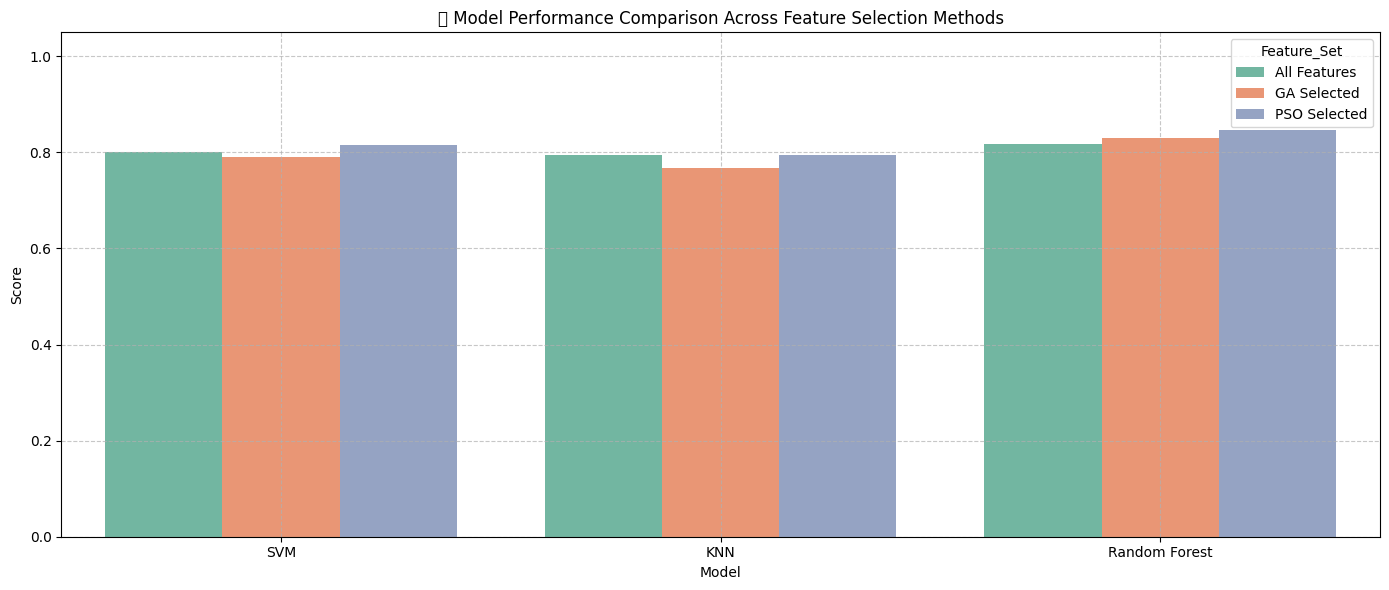

In [ ]:
# === Create and display results DataFrame ===
results_df = pd.DataFrame(comparison_data)
print("\n🔎 Final Model Performance Comparison:")
print(results_df.round(3))

# === Visualization ===
results_melted = results_df.melt(
    # Changed "Feature Set" to "Feature_Set" to match the DataFrame column name
    id_vars=["Model", "Feature_Set"],
    value_vars=["Accuracy", "Precision", "Recall", "F1_Score"],
    var_name="Metric",
    value_name="Score"
)

plt.figure(figsize=(14, 6))
sns.barplot(data=results_melted, x="Model", y="Score", hue="Feature_Set", ci=None, palette="Set2") # Updated hue as well
plt.title("📈 Model Performance Comparison Across Feature Selection Methods")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
# Updated legend title to match the column name in the DataFrame
plt.legend(title="Feature_Set")
plt.show()